In [2]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import random
import numpy as np
import pandas as pd
import nltk
nltk.data.path.append('.')

In [4]:
import os
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
# Define file paths and corresponding authors
file_paths_and_authors = [
    ("Data/CharlesDickens_1.txt", "Charles Dickens"),
    ("Data/CharlesDickens_2.txt", "Charles Dickens"),
    ("Data/CharlesDickens_3.txt", "Charles Dickens"),
    ("Data/JaneAusten_1.txt", "Jane Austen"),
    ("Data/JaneAusten_2.txt", "Jane Austen"),
    ("Data/JaneAusten_3.txt", "Jane Austen"),
    ("Data/WilliamShakespeare_1.txt", "William Shakespeare"),
    ("Data/WilliamShakespeare_2.txt", "William Shakespeare"),
    ("Data/WilliamShakespeare_3.txt", "William Shakespeare")
]
nlp.max_length = 2000000

# Load and preprocess texts
def load_texts(file_paths_and_authors):
    texts = []
    authors = []
    for file_path, author in file_paths_and_authors:
        with open(file_path, "r", encoding="utf-8") as file:
            texts.append(file.read())
            authors.append(author)
    return texts, authors
# Combine texts and authors into a list of tuples
texts, authors = load_texts(file_paths_and_authors)
combined_texts_and_authors = list(zip(texts, authors))


In [5]:
import re
from collections import Counter

# Text cleaning function
def clean_text(text):
    patterns_to_remove = [
        r"The Project Gutenberg eBook.*?CONTENTS",
        r"Preface.*?(?=CHAPTER I|$)",
        r"\*\*\* END OF THE PROJECT GUTENBERG EBOOK.*\*\*\*"
    ]
    for pattern in patterns_to_remove:
        text = re.sub(pattern, "", text, flags=re.DOTALL)
    return text

# Process each text and associate with author
processed_texts = []
processed_authors = []
for text, author in combined_texts_and_authors:
    cleaned_text = clean_text(text)
    processed_texts.append(cleaned_text)
    processed_authors.append(author)

# Combine all texts into a single string
combined_text = " ".join(processed_texts)
combined_authors = " ".join(processed_authors)
print(f"Combined text length: {len(combined_text)}")


Combined text length: 10689861


In [6]:
# Remove punctuations
clean_data = re.sub(r'[^\w\s]', '', combined_text)
print(f"Length of text with punctuations: {len(combined_text)}")
print(f"Length of text without punctuations: {len(clean_data)}")

data_words = clean_data.split()
clean_data_count = Counter(data_words)
dataframe = pd.DataFrame(clean_data_count.items(), columns=['Words', 'Frequency'])
dataframe_sorted = dataframe.sort_values(by='Frequency', ascending=False)
most_fifty = dataframe_sorted.head(50)
print(most_fifty)


Length of text with punctuations: 10689861
Length of text without punctuations: 10208798
      Words  Frequency
10      the      64321
9       and      51166
1         I      45022
41       to      44535
34       of      41765
43        a      32500
14       in      26779
355     you      22155
246    that      20821
854      my      18879
36       it      18403
182     his      16349
66     with      16198
238      is      16107
38      not      15289
948      me      14431
287      he      13822
39       be      13672
77      for      13182
525     her      12842
492     was      12744
25       as      12367
108    have      11774
950     him      10788
256     And      10054
115    this       9572
101      at       9110
850    your       8856
148      on       8775
49       so       8625
28      had       8309
29      but       7914
201     all       7662
173      by       7367
236     The       7319
795    will       7181
529     she       6704
243     are       5937
32     from   

In [7]:

# Function to split text into smaller chunks
def split_text_into_chunks(text, max_length):
    return [text[i:i + max_length] for i in range(0, len(text), max_length)]

# Split the clean data into manageable chunks for spaCy
max_length = 1000000  # spaCy's default maximum length
text_chunks = split_text_into_chunks(clean_data, max_length)

people_names = set()
places = set()

# Process each chunk separately
for chunk in text_chunks:
    doc = nlp(chunk)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            people_names.add(ent.text)
        elif ent.label_ == "GPE":
            places.add(ent.text)

print("People Names:", people_names)
print("Places:", places)


People Names: {'LONGAVILLE\n', 'Enter Cornelius', 'Exit First', 'Gracious', 'Pray', 'Jove\nMend', 'Lapis', 'Mrs Bayham Badger', 'Harold Skimpoles', 'John Moore', 'Don Armado', 'Peter Quince Flute', 'JOHN MONTGOMERY', 'Fare', 'Sirrah Ill', 'Enter Flavius', 'Delaford', 'Steed', 'ANDREW\nVery', 'Russell Square', 'Ambitions', 'Swoons', 'Jovial', 'Alls one', 'Jerry Barbarous', 'Sainte Guillotine', 'Robin Hoods', 'Ellis', 'hoveringI', 'Nereides', 'Jaggerth Jaggerth Jaggerth', 'Ratcliffe\n\nRATCLIFFE\n', 'Muffy All', 'John Lovetts', 'Kings', 'Blossom', 'Charles Darnays', 'Puss', 'George Rouncewell', 'Mama', 'Mrs J Gargery', 'Plain\nVanilla ASCII', 'Reenter Oswald', 'Courageous Roman', 'Tush', 'Lorenzo', 'seizeth', 'Mrs Richardson', 'Jack', 'Than Aquitaine', 'Flourish Alarums', 'Humphrey\nTis', 'heifers calf\nPard', 'Stoneleigh', 'Hermione', 'Bart Grandfather Smallweed', 'Jobling Smalls', 'Valentine', 'Mr Woodcourt', 'Jacob\n\nHarold', 'Summerss', 'Signior Antonio', 'Spanishliquoricewater', 'T

In [8]:
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

# Function to split text into chunks
def split_text(text, chunk_size):
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

# Function to associate each chunk with an author
def split_text_with_author(text, author, chunk_size):
    chunks = split_text(text, chunk_size)
    return [(chunk, author) for chunk in chunks]

# Split texts into chunks and label with authors
chunk_size = 500
chunks_and_authors = []
for text, author in zip(processed_texts, processed_authors):
    chunks_and_authors.extend(split_text_with_author(text, author, chunk_size))

# Extract proper names using spaCy and NLTK
def extract_proper_names_spacy(text):
    doc = nlp(text)
    proper_names = set()
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            proper_names.add(ent.text)
    return proper_names

def extract_proper_names_nltk(text):
    proper_names = set()
    for chunk in ne_chunk(pos_tag(word_tokenize(text))):
        if isinstance(chunk, Tree) and chunk.label() == 'PERSON':
            proper_names.add(' '.join([c[0] for c in chunk]))
    return proper_names

def process_chunk(chunk, author):
    proper_names_spacy = extract_proper_names_spacy(chunk)
    proper_names_nltk = extract_proper_names_nltk(chunk)
    has_proper_names = 'T' if proper_names_spacy or proper_names_nltk else 'F'
    return chunk, has_proper_names, author

results = [process_chunk(chunk, author) for chunk, author in chunks_and_authors]

texts, proper_names_labels, authors_labels = zip(*results)
df = pd.DataFrame({
    'Chunks': texts,
    'HasProperNames': proper_names_labels,
    'Author': authors_labels
})

print(df)




                                                  Chunks HasProperNames  \
0      ﻿\n\n            CHAPTER I\n\nIn Chancery\n\n\...              T   
1      snowflakes—gone into mourning, one might imagi...              F   
2      nts tenaciously to the pavement, and\naccumula...              T   
3      all boats. Fog in the eyes and throats of anci...              F   
4      in divers places in the streets, much as\nthe ...              T   
...                                                  ...            ...   
21380  tax exempt\nstatus with the IRS.\n\nThe Founda...              F   
21381  r state\nvisit www.gutenberg.org/donate.\n\nWh...              F   
21382  ck the Project Gutenberg web pages for current...              T   
21383  \ndistributed Project Gutenberg™ eBooks with o...              T   
21384   Gutenberg™,\nincluding how to make donations ...              T   

                    Author  
0          Charles Dickens  
1          Charles Dickens  
2          C

In [9]:
df['Author'].value_counts()

Author
William Shakespeare    11330
Charles Dickens         7483
Jane Austen             2572
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Encode the author labels
label_encoder = LabelEncoder()
df['AuthorEncoded'] = label_encoder.fit_transform(df['Author'])

# Convert labels to numerical values
df['HasProperNames'] = df['HasProperNames'].map({'T': 1, 'F': 0})

# Define features and target
X = df['Chunks']
y = df['AuthorEncoded']

# Convert text data to numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8830956277764789


In [11]:
# Load and preprocess the validation dataset
validation_file_paths_and_authors = [
    ("Data/CharlesDickens.txt", "Charles Dickens"),
    ("Data/JaneAusten.txt", "Jane Austen"),
    ("Data/WilliamShakespeare.txt", "William Shakespeare")
]

validation_texts, validation_authors = load_texts(validation_file_paths_and_authors)

# Clean validation texts
processed_validation_texts = []
processed_validation_authors = []
for text, author in zip(validation_texts, validation_authors):
    cleaned_text = clean_text(text)
    processed_validation_texts.append(cleaned_text)
    processed_validation_authors.append(author)

# Split validation texts into chunks
validation_chunks_and_authors = []
for text, author in zip(processed_validation_texts, processed_validation_authors):
    validation_chunks_and_authors.extend(split_text_with_author(text, author, chunk_size))

# Predict the author for each chunk in the validation dataset
def predict_author(chunk):
    clean_chunk = re.sub(r'[^\w\s]', '', chunk)
    chunk_vectorized = vectorizer.transform([clean_chunk])
    predicted_label_encoded = classifier.predict(chunk_vectorized)
    predicted_author = label_encoder.inverse_transform(predicted_label_encoded)
    return predicted_author[0]

validation_predictions = []
validation_actual = []
for chunk, actual_author in validation_chunks_and_authors:
    predicted_author = predict_author(chunk)
    validation_predictions.append(predicted_author)
    validation_actual.append(actual_author)
# Display the predictions
for actual_author, predicted_author in zip(validation_actual, validation_predictions):
    print(f"Actual Author: {actual_author}, Predicted Author: {predicted_author}")

Actual Author: Charles Dickens, Predicted Author: William Shakespeare
Actual Author: Charles Dickens, Predicted Author: William Shakespeare
Actual Author: Charles Dickens, Predicted Author: William Shakespeare
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dickens
Actual Author: Charles Dickens, Predicted Author: Charles Dicken

Confusion Matrix:
 [[1746    0   79]
 [1360    5   55]
 [  30    0  365]]


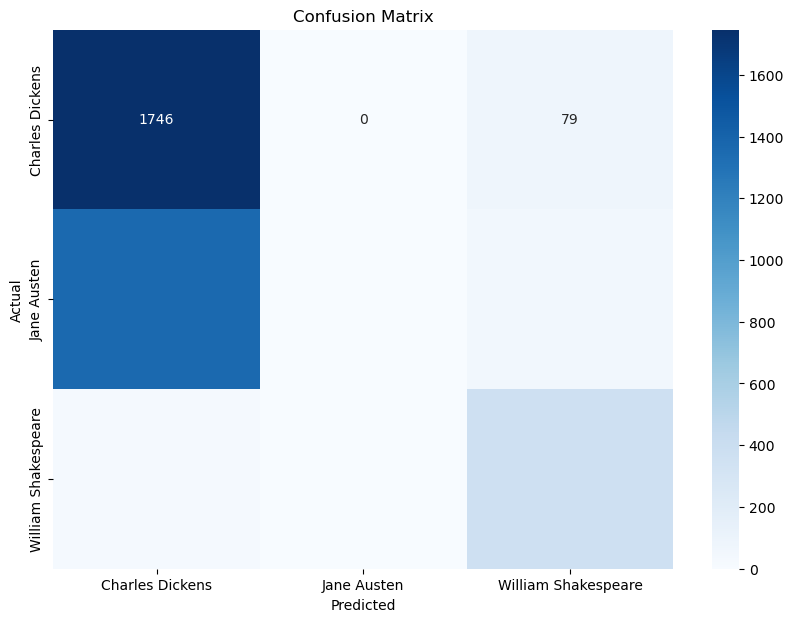


Classification Report:
                      precision    recall  f1-score   support

    Charles Dickens       0.56      0.96      0.70      1825
        Jane Austen       1.00      0.00      0.01      1420
William Shakespeare       0.73      0.92      0.82       395

           accuracy                           0.58      3640
          macro avg       0.76      0.63      0.51      3640
       weighted avg       0.75      0.58      0.44      3640



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
#Encode the actual validation authors
validation_actual_encoded = label_encoder.transform(validation_actual)

# Encode the predicted authors
validation_predictions_encoded = label_encoder.transform(validation_predictions)

# Compute the confusion matrix
conf_matrix = confusion_matrix(validation_actual_encoded, validation_predictions_encoded)
print("Confusion Matrix:\n", conf_matrix)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(validation_actual_encoded, validation_predictions_encoded, target_names=label_encoder.classes_))